# Execute the code below

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather = df_weather.iloc[:,[0,1,2, -4]]

# Univariate linear regression with Scikit-Learn

Scikit-Learn is the greatest Machine Learning library for Python. Do you remember that you can do Linear regression with NumPy ? You can do the same with Scikit-Learn. And many other things!
Let's start with univariate Linear regression, to learn the syntax.

## Print a regplot with seaborn to show a linear regression between Sunhours (on the X-axis) and MAX temperature (on the Y-axis).

In [2]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR
0,2019-01-01,9,4,5.1
1,2019-01-02,8,5,8.7
2,2019-01-03,6,0,8.7
3,2019-01-04,5,-1,5.1
4,2019-01-05,6,-1,8.7


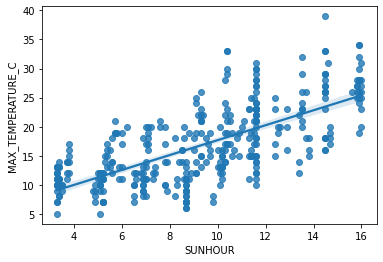

In [4]:
# Your code here :

sns.regplot(x='SUNHOUR',
            y='MAX_TEMPERATURE_C',
            data = df_weather)

## Train the model
You just have to read and execute the code below

In [5]:
# Scikit-Learn can find the coefficients of the linear regression
from sklearn.linear_model import LinearRegression

# First of all, you have to define 2 series :
# X-axis : the correlated column, here it is Sunhours
X = df_weather[['SUNHOUR']] 

# Y-axis : the column to predict, so MAX Temperature here
y = df_weather['MAX_TEMPERATURE_C'] 

# Hey, why is "X" in uppercase and "y" in lowercase ? That's a good point, we'll see that in the next quest. Now, you just have to use this.

# To train a machine learning model (here, it will find the equation of the linear regression), you just have launch the ".fit" method.
modelLR = LinearRegression().fit(X, y)

## Explore the model

In [6]:
# Your model is trained, it has now some attributes.
# Coefficient, it's the "a" in your equation "aX + b"
print("coefficient :",modelLR.coef_)

# Interception, it's the "b" in your equation "aX + b"
print("intercept :", modelLR.intercept_)


coefficient : [1.28422116]
intercept : 4.8472953557195435


## Prediction for 1 value

In [7]:
# You can "predict" the Max Temperature from the Sunhours
# For example, let's try if Sunhours is 10 :

# Hand calculation :
print("By hand :", modelLR.coef_ * 10 + modelLR.intercept_ )

# With a Scikit-Learn function :
print("Scikit-Learn :  ", modelLR.predict([[10]])  )

By hand : [17.68950691]
Scikit-Learn :   [17.68950691]


## Predictions for multiple values (a Serie)
Let's predict MAX temperature for the Sunhour column of your DataFrame.

Note : You'll have to precise your column with double "[", like that  : df[['your_column]] 

*Why ? We'll see that in the next quest.*

In [10]:
# Find a way to store the result of the prediction in a new column 'predict" of the dataframe
df_weather['predict'] = modelLR.predict(df_weather[['SUNHOUR']])
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR,predict
0,2019-01-01,9,4,5.1,11.396823
1,2019-01-02,8,5,8.7,16.020019
2,2019-01-03,6,0,8.7,16.020019
3,2019-01-04,5,-1,5.1,11.396823
4,2019-01-05,6,-1,8.7,16.020019


## Visualisations
You can predict the Max temperature from any value of Sunhour. Your prediction is now stored in a column, you can now visualize it. 

It's to you now :
Create on the same scatterplot chart :
- X-axis : Sunhours
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

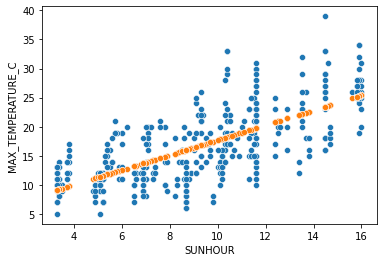

In [11]:
# Your code here :
sns.scatterplot(x='SUNHOUR',
                y='MAX_TEMPERATURE_C',
                data = df_weather)
sns.scatterplot(x='SUNHOUR',
                y='predict',
                data = df_weather)
plt.show()

Your prediction is stored in a DataFrame. **So, you can visualize your prediction without the "source" column.** Let's try it.
Create on the same scatterplot chart :
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict' in red dots.

In [13]:
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

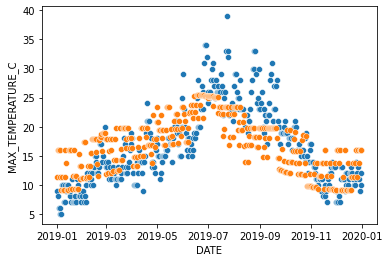

In [14]:
# Your code here :
sns.scatterplot(x='DATE',
                y='MAX_TEMPERATURE_C',
                data = df_weather)
sns.scatterplot(x='DATE',
                y='predict',
                data = df_weather)
plt.show()

Hey, but it doesn't seem linear ! And yet it is...

# Predictions on a more correlated column
Do the same steps to obtain a new colum "predict2". Your goal is to predict "MAX temperature" from the "MIN temperature" column.

In [19]:
# Your code here :
X = df_weather[['MIN_TEMPERATURE_C']] 
y = df_weather['MAX_TEMPERATURE_C'] 

modelLR2 = LinearRegression().fit(X, y)

df_weather['predict2'] = modelLR2.predict(df_weather[['MIN_TEMPERATURE_C']])
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,SUNHOUR,predict,predict2
0,2019-01-01,9,4,5.1,11.396823,10.579999
1,2019-01-02,8,5,8.7,16.020019,11.802741
2,2019-01-03,6,0,8.7,16.020019,5.689031
3,2019-01-04,5,-1,5.1,11.396823,4.466289
4,2019-01-05,6,-1,8.7,16.020019,4.466289


## Scatterplot 1
- X-axis : MIN temperature
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

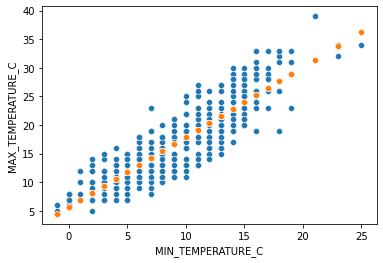

In [20]:
sns.scatterplot(x='MIN_TEMPERATURE_C',
                y='MAX_TEMPERATURE_C',
                data = df_weather)
sns.scatterplot(x='MIN_TEMPERATURE_C',
                y='predict2',
                data = df_weather)
plt.show()

## Scatterplot 2
- X-axis : DATE
- Y-axis : MAX temperatures in blue dots and 'predict2' in red dots.

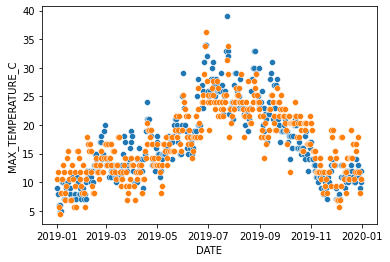

In [21]:
# Your code here :
sns.scatterplot(x='DATE',
                y='MAX_TEMPERATURE_C',
                data = df_weather)
sns.scatterplot(x='DATE',
                y='predict2',
                data = df_weather)
plt.show()